### Explanation of Gradient Boosting Algorithm with Mathematics

Gradient Boosting is an ensemble learning technique that builds a model in a stage-wise fashion from weak learners, typically decision trees. Each stage focuses on correcting the errors made by the previous stage by optimizing a specified loss function.

#### Initial Setup

1. **Define the Loss Function**: Let $L(y, F(x))$ be the loss function where $y$ is the true value and $F(x)$ is the prediction.
2. **Initialize the Model**: Start with a constant model $F_0(x)$ that minimizes the loss function:
    $$
    F_0(x) = \arg \min_{c} \sum_{i=1}^N L(y_i, c)
    $$
    Find a c (predicted value) that minimizes the loss function.
3. **Iterate to Add Trees**: For $m = 1$ to $M$ (number of boosting stages):
    1. **Compute the Negative Gradient**: The negative gradient of the loss function with respect to the current model’s predictions gives the direction of the steepest descent:
        $$
        r_{im} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{m-1}(x)}
        $$
    2. **Fit a Weak Learner**: Fit a weak learner (e.g., a decision tree) $h_m(x)$ to the negative gradients (pseudo-residuals):
        $$
        h_m(x) = \arg \min_h \sum_{i=1}^N (r_{im} - h(x_i))^2
        $$
    3. **Compute the Step Size**: Determine the step size $\gamma_m$ by solving:
        $$
        \gamma_m = \arg \min_{\gamma} \sum_{i=1}^N L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i))
        $$
    4. **Update the Model**: Update the model by adding the weighted weak learner to the current model:
        $$
        F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)
        $$

#### Algorithm Summary

1. **Initialize**: $F_0(x) = \arg \min_{c} \sum_{i=1}^N L(y_i, c)$
2. **For each stage $m = 1$ to $M$**:
    - Compute the negative gradient (pseudo-residuals): $r_{im} = - \left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{m-1}(x)}$
    - Fit a weak learner $h_m(x)$ to the pseudo-residuals
    - Compute the step size $\gamma_m$
    - Update the model: $F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$

### Detailed Explanation of Steps with Examples

Let's consider a regression problem with the squared error loss function $L(y, F(x)) = \frac{1}{2}(y - F(x))^2$:
1. **Initial Model**: $F_0(x) = \arg \min_{c} \sum_{i=1}^N \frac{1}{2}(y_i - c)^2$, which is the mean of the target values:
    $$
    F_0(x) = \frac{1}{N} \sum_{i=1}^N y_i
    $$
2. **Negative Gradient**: For the squared error loss, the negative gradient is the residual:
    $$
    r_{im} = y_i - F_{m-1}(x_i)
    $$
3. **Fit a Weak Learner**: Fit a weak learner (e.g., a regression tree) to the residuals $r_{im}$.
4. **Step Size**: For the squared error loss, the optimal step size $\gamma_m$ can be computed as:
    $$
    \gamma_m = \arg \min_{\gamma} \sum_{i=1}^N \frac{1}{2}(y_i - (F_{m-1}(x_i) + \gamma h_m(x_i)))^2
    $$
    which simplifies to:
    $$
    \gamma_m = \frac{\sum_{i=1}^N r_{im} h_m(x_i)}{\sum_{i=1}^N h_m(x_i)^2}
    $$
5. **Model Update**: Update the model:
    $$
    F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)
    $$

This process iteratively builds an ensemble model that minimizes the loss function.

#### Conclusion

Gradient Boosting is a powerful technique that combines multiple weak learners to create a strong learner by focusing on the mistakes of the previous models. The mathematical foundation ensures that each iteration reduces the overall error, leading to a highly accurate model.


### Step 1 in detail- Initializing the Model

In the context of regression with squared error loss, the initial model $F_0(x)$ is chosen to minimize the loss function over the entire training dataset. The squared error loss function for a single data point $(x_i, y_i)$ is given by:

$$
L(y_i, F(x_i)) = \frac{1}{2} (y_i - F(x_i))^2
$$

The factor $\frac{1}{2}$ is often included for mathematical convenience (it cancels out when taking derivatives), but it does not affect the minimization process.

#### Objective: Minimize the Initial Loss

We need to find a constant value $c$ that minimizes the total loss over all training examples. Thus, the objective is to find $c$ that minimizes the sum of squared errors:

$$
F_0(x) = \arg \min_c \sum_{i=1}^N L(y_i, c) = \arg \min_c \sum_{i=1}^N \frac{1}{2} (y_i - c)^2
$$

#### Simplifying the Objective

To find $c$, we can differentiate the loss function with respect to $c$ and set the derivative to zero:

$$
\frac{\partial}{\partial c} \sum_{i=1}^N \frac{1}{2} (y_i - c)^2 = 0
$$

Simplifying the derivative:

$$
\sum_{i=1}^N (y_i - c) = 0
$$

This equation states that the sum of the differences between each $y_i$ and $c$ should be zero. We can further simplify:

$$
\sum_{i=1}^N y_i - N \cdot c = 0
$$

Solving for $c$:

$$
c = \frac{1}{N} \sum_{i=1}^N y_i
$$

This means that $c$ is simply the mean of the target values $y$. Therefore, the initial model $F_0(x)$ is a constant model that predicts the mean of the target values for all input $x$.

### Mathematical Summary

To summarize mathematically:

1. The squared error loss for each point $(x_i, y_i)$ is:
   $$
   L(y_i, F(x_i)) = \frac{1}{2} (y_i - F(x_i))^2
   $$

2. The total loss over the dataset is:
   $$
   \sum_{i=1}^N L(y_i, F(x_i)) = \sum_{i=1}^N \frac{1}{2} (y_i - F(x_i))^2
   $$

3. To minimize this total loss with respect to a constant prediction $c$:
   $$
   F_0(x) = \arg \min_c \sum_{i=1}^N \frac{1}{2} (y_i - c)^2
   $$

4. Taking the derivative and setting it to zero:
   $$
   \frac{\partial}{\partial c} \sum_{i=1}^N \frac{1}{2} (y_i - c)^2 = 0
   $$
   $$
   \sum_{i=1}^N (y_i - c) = 0
   $$
   $$
   \sum_{i=1}^N y_i - N \cdot c = 0
   $$
   $$
   c = \frac{1}{N} \sum_{i=1}^N y_i
   $$

Hence, the initial model $F_0(x)$ predicts the mean of the target values for all data points in the training set.

### Understanding Terminal Regions in Gradient Boosting

In the context of the Gradient Boosting algorithm, the term "terminal regions" refers to the leaves of the decision tree (weak learner) that is fitted to the pseudo-residuals during each boosting iteration. Let's explain this in more detail.

### Terminal Regions

When a decision tree is trained, it partitions the data space into distinct regions. Each leaf node in the tree represents a terminal region, which is a subset of the data points that satisfy certain conditions defined by the tree's splits. In other words, a terminal region is where the predictions of the decision tree are constant.

#### Formal Definition

Consider a decision tree $h_m(x)$ fitted to the pseudo-residuals $r_{im} = y_i - F_m(x_i)$ during the $m$-th iteration of Gradient Boosting. The tree divides the input space into $J_m$ terminal regions, denoted as $R_{jm}$ for $j = 1, 2, \ldots, J_m$.

Each terminal region $R_{jm}$ corresponds to a leaf node of the tree. Within each region, the decision tree assigns a constant value, which is the mean of the pseudo-residuals of the data points falling into that region.

### How Terminal Regions are Used in Gradient Boosting

#### Step-by-Step Explanation:

1. **Calculate Pseudo-Residuals:**
   For each data point $i$, calculate the pseudo-residual $r_{im} = y_i - F_m(x_i)$.

2. **Fit the Weak Learner:**
   Train a decision tree on the original input features $x_i$ and the pseudo-residuals $r_{im}$. The decision tree partitions the input space into terminal regions $R_{jm}$.

3. **Calculate Region-Specific Predictions:**
   For each terminal region $R_{jm}$, calculate the mean of the pseudo-residuals of the data points within that region:
   $$
   \gamma_{jm} = \frac{ \sum_{x_i \in R_{jm}} r_{im} }{ \left| R_{jm} \right| }
   $$

4. **Update the Model:**
   Update the model by adding the predictions of the decision tree to the current model's predictions:
   $$
   F_{m+1}(x) = F_m(x) + \eta \sum_{j=1}^{J_m} \gamma_{jm} \mathbf{1}(x \in R_{jm})
   $$
   where $\eta$ is the learning rate and $\mathbf{1}(x \in R_{jm})$ is an indicator function that is 1 if $x$ belongs to region $R_{jm}$ and 0 otherwise. The summation means in case a sample x belongs to multiple terminal regions $R_{jm}$, we will sum the $\gamma_{jm}$ for all such regions.

### Detailed Explanation

1. **Initialize the Model:** The initial model $F_0$ is the mean of the target values, predicting this mean for all inputs.
2. **Calculate Pseudo-Residuals:** For each data point, calculate the difference between the actual target value and the current model's prediction.
3. **Fit a Weak Learner:** Train a weak learner (e.g., a decision tree) using the original input features and the pseudo-residuals as the target. This weak learner attempts to predict the residuals.
4. **Update the Model:** The current model is updated by adding the predictions of the weak learner to it. This helps in reducing the residuals and improving the model's accuracy.

By repeating these steps, the Gradient Boosting algorithm incrementally builds a strong model by combining multiple weak learners. Each weak learner focuses on the errors (residuals) made by the previous model, leading to a more accurate overall model.


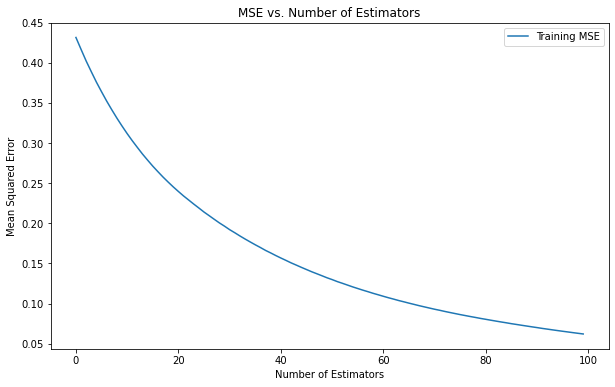

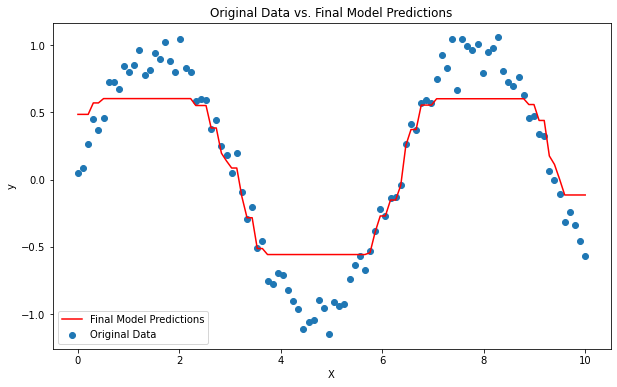

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Initial model: predict the mean of y
F0 = np.mean(y)
F_m = np.full(y.shape, F0)
n_estimators = 100
learning_rate = 0.1
mse = []

# Store predictions for each stage
predictions = np.zeros((n_estimators, len(y)))

for m in range(n_estimators):
    # Step 2: Compute pseudo-residuals
    residuals = y - F_m

    # Step 3: Fit a weak learner to the pseudo-residuals
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(X, residuals)
    h_m = tree.predict(X)

    # Step 4: Compute the step size
    gamma_m = np.sum(residuals * h_m) / np.sum(h_m ** 2)

    # Step 5: Update the model
    F_m += learning_rate * gamma_m * h_m

    # Save predictions
    predictions[m] = F_m

    # Compute and store the mean squared error
    mse.append(mean_squared_error(y, F_m))

# Plot the MSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(n_estimators), mse, label='Training MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Estimators')
plt.legend()
plt.show()

# Plot the original data and the final predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original Data')
plt.plot(X, F_m, color='red', label='Final Model Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data vs. Final Model Predictions')
plt.legend()
plt.show()
